# APPLIED STATISTICS(ECS764P) : COURSEWORK-4

NAME: OMKAR ANANT BARE

STUDENT NUMBER : 220459749

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pandas_datareader import wb
import matplotlib.pyplot as plt 
import numpy as np
import scipy
from scipy import stats

# Question 1 Solution:

/usr/local/lib/python3.8/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


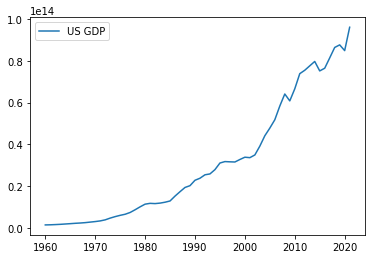

In [3]:
from pandas_datareader import wb
import matplotlib.pyplot as plt 
import numpy as np

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960', end='2021')

time = np.arange(1960,2022)

gdp = gdp_data.iloc[:,0].astype(float).to_numpy()

# Data is returned in inverse chronological order , so reverse order
gdp = np.flip(gdp)

# Plot world GDP data against time
plt.plot(time, gdp, label='US GDP')
plt.legend ()
plt.show()

##### We can get a linear relationship by applying a simple transformation f(−) on both side of the equation. What is this transformation?

$ Answer: $

By using the logarithm (log) transformation, we can obtain a linear relationship.

#### Apply this transformation f(−) to the GDP data, and perform a regression against the time variable. On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and your R^2 value.

In [4]:
# apply log transformation to the GDP data
transformed_data = np.log(gdp)

# perform linear regression against the time variable
slope, intercept, r_value, p_value, std_err = stats.linregress(time, transformed_data)

predicted_values  = slope * time + intercept

# R square value
r_squared = r_value**2

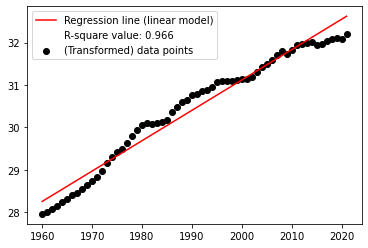

In [5]:
# plot transformed data points
plt.scatter(time, transformed_data, color='black', label='(Transformed) data points');

# plot regression line
plt.plot(time, predicted_values , color='red', label='Regression line (linear model)');

# display r-square value
plt.plot([], [],' ', label=f'R-square value: {round(r_squared, 3)}')
plt.legend();

In [6]:
print(f"R-square value: {r_squared}")

R-square value: 0.9657576197917563


#### Compute the residuals of your regression (i.e. the difference between the model and the observations), and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we can reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation σˆ. Take α = 99%.

In [7]:
residuals = transformed_data - predicted_values

In [8]:
mean = np.mean(residuals)
std  = np.std(residuals)
print(f'Mean of residuals is {mean}\nstandard deviation of residuals is {std}')

Mean of residuals is -2.234771507632573e-15
standard deviation of residuals is 0.2410710157684099


KS-test:

Null Hypothesis: Residuals are sampled from a normal distribution with mean 0 and standard deviation σˆ (0.241)

$\alpha $ = 99%

In [9]:
alpha = 0.99
display(1 - alpha)

0.010000000000000009

In [10]:
normal_distribution = np.random.normal(loc=0.0, scale=std, size=10000)

# perform KS-test
stats, p_value = scipy.stats.kstest(residuals, normal_distribution)

In [11]:
display(p_value < (1-alpha))

False

Null hypothesis cannot be rejected as p-value > 1 - $\alpha$.

Therefore, It is probable to say that the residuals are drawn from a normal distribution with a mean of 0 and a standard deviation of  σˆ (0.241).

#### You will now apply the inverse of the transformation f(−) to your linear model in order to get a non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot of the (original) data points.

In [12]:
# inverse of the transformation to linear model 
non_linear_tranformed_data = np.exp(predicted_values)

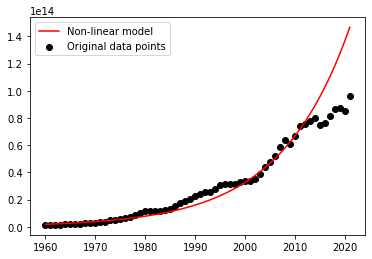

In [13]:
plt.scatter(time, gdp, color='black', label='Original data points');
plt.plot(time, non_linear_tranformed_data, color='Red',label='Non-linear model');
plt.legend();

#### What is the relationship between the slope of the regression and the long-term growth rate of the world GDP? Compute the long-term growth rate of the world GDP.

In [14]:
# long-term growth rate of the world GDP
cagr = ((gdp[-1]/gdp[0])**(1/62)) - 1 # cagr: compound annual growth rate

In [15]:
print(f' Long-term growth rate of the world GDP is {cagr}\n\n Slope of regression is {slope}')

 Long-term growth rate of the world GDP is 0.07068665034575994

 Slope of regression is 0.07154059169048223


The slope of regression, which is approximately 0.701 (which indicates approximately 7.01% growth rate), is nearly identical to the long-term growth rate of the global GDP, which is around 0.706 (approximately 7.06%).

#### What do you observe since approximately 2015.

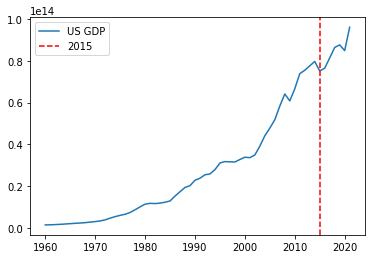

In [16]:
# plot world GDP data against time
plt.plot(time, gdp, label='US GDP')

# plot vertical line at x = 2015
plt.axvline(x = 2015, color = 'r', linestyle='--', label = '2015')

plt.legend ()
plt.show()

In [17]:
cagr_2015_2022 = ((gdp[-1]/gdp[-7]) ** (1/7)) - 1 # gdp[-7]: gdp at 2015
print(cagr_2015_2022)

0.03569587173888511


In [18]:
growth_rate_2015 = (gdp[-1] - gdp[-7]) / gdp[-7]
print(growth_rate_2015)

0.2782791821663549


Since 2015, the GDP has grown by about 27.8%, and following 2015, long-term growth is expected to be about 3.5% annually.

# Question 2 Solution:

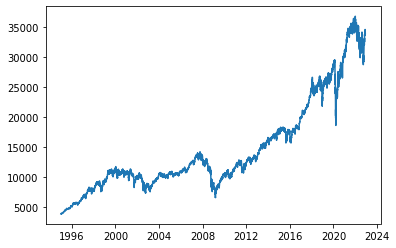

In [19]:
import pandas_datareader.data as web 
import matplotlib.pyplot as plt

data = web.DataReader('^DJI', 'yahoo', start='1995-01-01', end='2022-12-05')
data = data.reset_index() 
dates = data["Date"]
dow = data["Close"].to_numpy()

plt.plot(dates, dow)
plt.show()

#### Instantiate an array lags = [1, 2, 3, 5, 10, 15, 20, 30]. For each lag in lags compute and plot the history of the 60-day rolling autocorrelation of dow. Make your plot(s) legible.

In [20]:
lags = [1, 2, 3, 5, 10, 15, 20, 30]

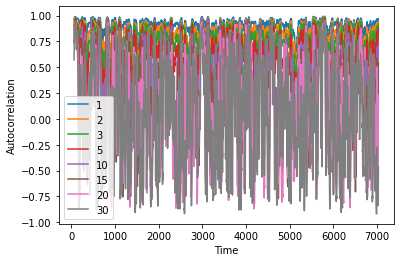

In [21]:
# plot containing combined rolling autocorrelation for all lags
for lag in lags:
    
 # Compute the 60-day rolling autocorrelation for the specified lag value
  autocorrelation_dow = data['Close'].rolling(60).apply(lambda x: x.autocorr(lag=lag))
    
  # Plot the history of the autocorrelation
  autocorrelation_dow.plot()
  

plt.legend(lags)
plt.xlabel("Time")
plt.ylabel("Autocorrelation")

plt.show()

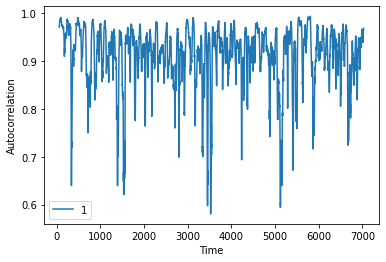

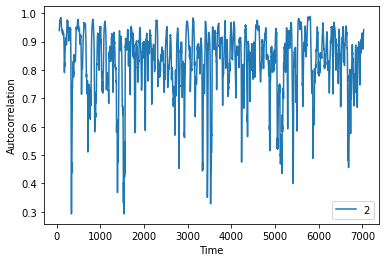

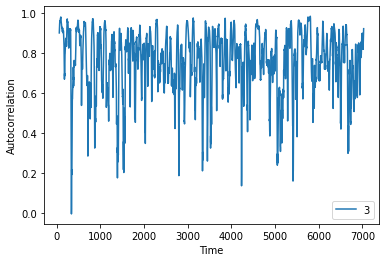

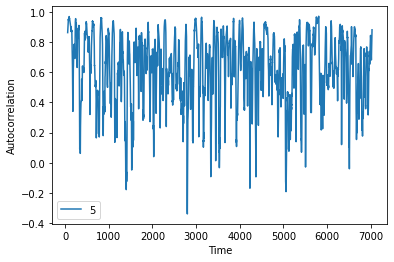

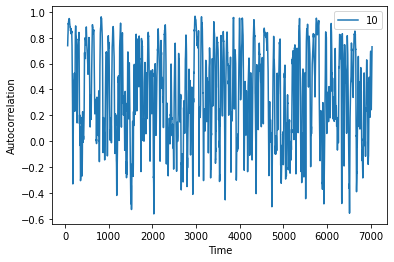

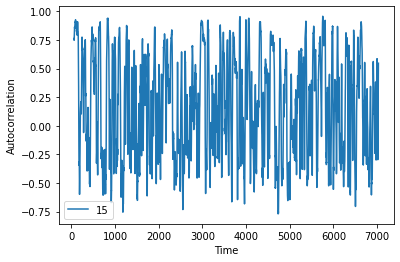

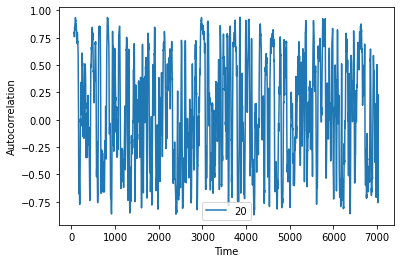

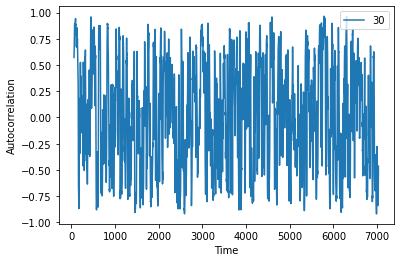

In [22]:
# individual plots containing rolling autocorrelation for lag in lags
autocorrelation = []

for lag in lags:
    
    # Compute the 60-day rolling autocorrelation for the specified lag value
    autocorrelation = data['Close'].rolling(60).apply(lambda x: x.autocorr(lag=lag))
    
    # Plot the history of the autocorrelation
    autocorrelation.plot()
    
    plt.legend([lag])
    plt.xlabel("Time")
    plt.ylabel("Autocorrelation")
    plt.show()

#### For each lag in lags, compute the average of the autocorrelation times series computed in the previous step and use these 8 values to plot the autocorrelation function (autocorrelation against lag). What do you observe? Does this plot suggest that the Dow Jones is a white noise process? If not, can you suggest a better model?

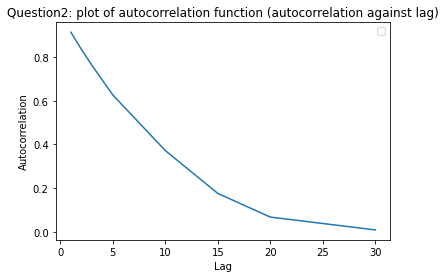

In [23]:
autocorrelations = []
for lag in lags:
    # compute the average autocorrelation for the lag
    autocorrelation2 = np.mean(data['Close'].rolling(60).apply(lambda x: x.autocorr(lag=lag)))
    autocorrelations.append(autocorrelation2)
    
# plot legend to the plot
plt.legend(lags)

plt.plot(lags, autocorrelations)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.title('Question2: plot of autocorrelation function (autocorrelation against lag)')
plt.show()

This plot doesn't imply that it has a white noise process.
Autoregressive (AR) model is a better model that can directly capture autocorrelation.

#### Compute and plot the daily returns of the Dow Jones, repeat the previous two steps and answer the same questions for this time series instead.

In [24]:
# function to compute the time series of (percentage) daily returns
def daily_return(x):
    '''
    funtion to compute daily returns.
    '''
    daily_returns = [0]
    for t in range(1, len(x)):
        return_t = 100 * ((x[t] / x[t-1]) - 1)
        daily_returns.append(return_t)
    return daily_returns

In [25]:
#compute daily return
daily_returns = np.array(daily_return(dow))
data['Daily Returns'] = daily_returns

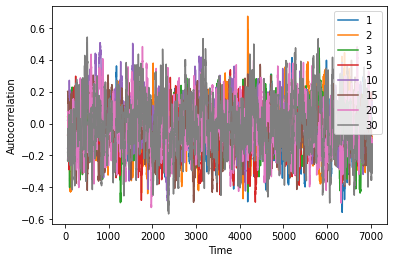

In [26]:
# plot containing combined rolling autocorrelation for all lags
autocorrelation_daily_returns = []
for lag in lags:
 # Compute the 60-day rolling autocorrelation for the specified lag value
  autocorrelation_daily_returns = data['Daily Returns'].rolling(60).apply(lambda x: x.autocorr(lag=lag))
  # Plot the history of the autocorrelation
  autocorrelation_daily_returns.plot()
    
plt.legend(lags)
plt.xlabel("Time")
plt.ylabel("Autocorrelation")
plt.show()

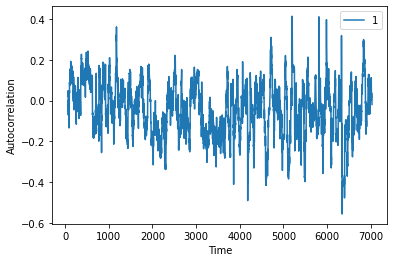

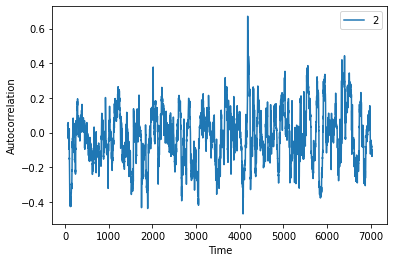

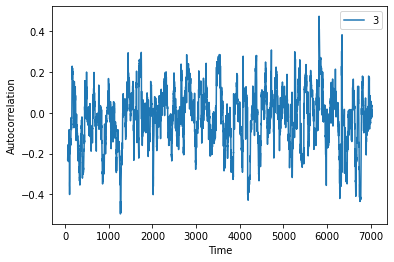

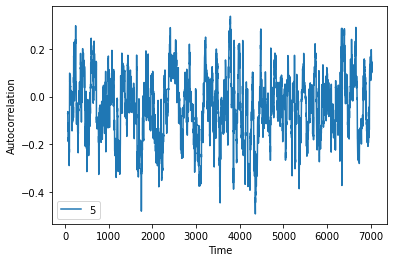

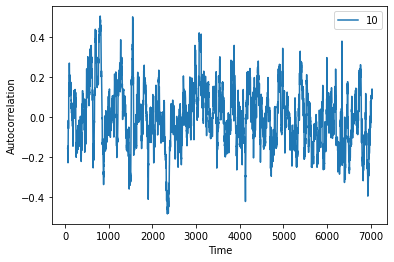

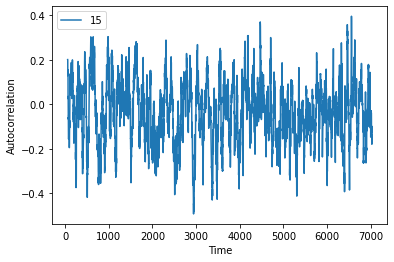

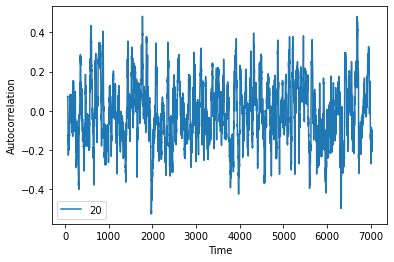

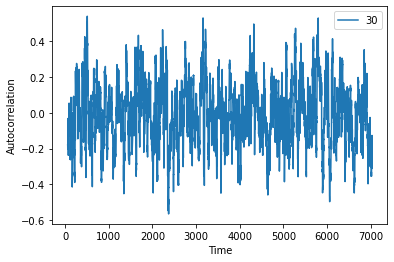

In [27]:
# individual plots containing rolling autocorrelation for lag in lags

autocorrelation_daily_returns2 = []

for lag in lags:
    
    # compute the 60-day rolling autocorrelation for the specified lag value
    autocorrelation_daily_returns2 = data['Daily Returns'].rolling(60).apply(lambda x: x.autocorr(lag=lag))
    # plot the history of the autocorrelation
    autocorrelation_daily_returns2.plot()

    plt.xlabel("Time")
    plt.ylabel("Autocorrelation")

    plt.legend([lag])
    plt.show()

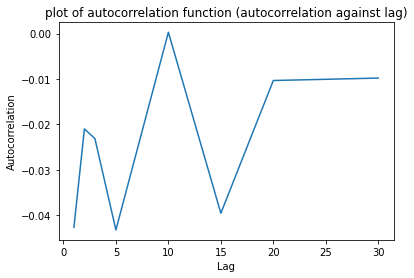

In [28]:
autocorrelations_daily_returns = []

for lag in lags:
    # Compute the average autocorrelation for the current lag
    autocorrelation_daily_returns3 = np.mean(data['Daily Returns'].rolling(60).apply(lambda x: x.autocorr(lag=lag)))
    autocorrelations_daily_returns.append(autocorrelation_daily_returns3)

plt.plot(lags, autocorrelations_daily_returns)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('plot of autocorrelation function (autocorrelation against lag)')
plt.show()